In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [259]:
df= pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [5]:
len(df['Dep_Time'].unique())

222

In [6]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.duplicated().sum()

220

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df.shape

(10462, 11)

In [14]:
df.describe().T

count         mean          std     min     25%     50%       75%  \
Price  10462.0  9026.790289  4624.849541  1759.0  5224.0  8266.0  12344.75   

           max  
Price  79512.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [16]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [17]:
df['Arrival_Time'][0].split( )

['01:10', '22', 'Mar']

In [18]:
df['ArrivalTime'] = df['Arrival_Time'].apply(lambda x : x.split( )[0])

In [19]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

  ArrivalTime  
0       01:10  
1       13:15  
2       04:25  
3       23:30  
4       21:35

In [20]:
arrivallst=df['Arrival_Time'].tolist()

In [21]:
def getarrivaldetails (arr , cat) : 
    if len(arr.split()) == 1 :
        return 'none'
    else :
        if cat == 'D':
            return arr.split()[1]
        elif cat == 'M' : 
            return arr.split()[2]

In [22]:
df['ArrivalDay'] = df['Arrival_Time'].apply(lambda x : getarrivaldetails(x,'D'))
df['ArrivalMonth'] = df['Arrival_Time'].apply(lambda x : getarrivaldetails(x,'M'))

In [23]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

  ArrivalTime ArrivalDay ArrivalMonth  
0       01:10         22          Mar  
1       13:15       none         none  
2       04:25         10          Jun  
3       23:30       none         none  
4       21:35       none         none

In [24]:
df.drop(columns = ['Additional_Info'] , axis = 0 , inplace = True)

In [25]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
0    22:20  01:10 22 Mar   2h 50m    non-stop   3897       01:10         22   
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   

  ArrivalMonth  
0          Mar  
1         none  
2          Jun  
3         none  
4         none

In [26]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'] , errors = 'coerce' , format='%d/%m/%Y')

In [27]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
0    22:20  01:10 22 Mar   2h 50m    non-stop   3897       01:10         22   
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   

  ArrivalMonth  
0          Mar  
1         none  
2          Jun  
3         none  
4         none

In [28]:
df['Year'] = df['Date_of_Journey'].dt.year
df['Dayofjourney'] = df['Date_of_Journey'].dt.day
df['Monthofjourney'] = df['Date_of_Journey'].dt.month

In [29]:
# df['Date_of_Journey'][0].split('/')[2] 

In [30]:
# df['Year'] = df['Date_of_Journey'].apply( lambda x : x.split('/')[2])
# df['Dayofjourney'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[0])
# df['Monthofjourney'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[1])

In [31]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
0    22:20  01:10 22 Mar   2h 50m    non-stop   3897       01:10         22   
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney  
0          Mar  2019            24               3  
1         none  2019             1               5  
2          Jun  2019             9               6  
3         none  2019            12               5  
4         none  2019             1               3

In [32]:
def GetDiff(a,b) : 
    if b!= 'none' : 
        return int(b) - int(a)
    else :
        return 'none'

df['DayDiff'] = df.apply(lambda x : GetDiff(x.Dayofjourney,x.ArrivalDay)   ,axis=1)

In [33]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
0    22:20  01:10 22 Mar   2h 50m    non-stop   3897       01:10         22   
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff  
0          Mar  2019            24               3      -2  
1         none  2019             1               5    none  
2          Jun  2019             9               6       1  
3         none  2019            12               5    none  
4         none  2019             1               3    none

In [34]:
df['DayDiff'].unique()

array([-2, 'none', 1, 4, 2, -5, -1], dtype=object)

In [35]:
df['DayDiff'].value_counts()

none    6320
1       3967
-2        84
4         52
2         34
-5         4
-1         1
Name: DayDiff, dtype: int64

In [36]:
df.drop(df[(df['DayDiff']!=1.0) & (df['DayDiff']!='none')].index , axis = 0 , inplace = True)

In [37]:
df['DayDiff'].unique()

array(['none', 1], dtype=object)

In [38]:
df['DayDiff'].value_counts()

none    6320
1       3967
Name: DayDiff, dtype: int64

In [39]:
df['Monthofjourney'].value_counts()

5    3385
6    3306
3    2519
4    1077
Name: Monthofjourney, dtype: int64

In [40]:
# df['Monthofjourney'] = df['Monthofjourney'].astype(int)

In [41]:
# df['Dayofjourney'] = df['Dayofjourney'].astype(int)

In [42]:
df['Dayofjourney'].value_counts()

9     1347
6     1260
27    1085
1     1056
21    1047
24    1006
15     961
12     946
3      810
18     769
Name: Dayofjourney, dtype: int64

In [43]:
df[df['Monthofjourney'] ==4]['Source'].value_counts()

Banglore    423
Kolkata     375
Delhi       241
Mumbai       38
Name: Source, dtype: int64

In [44]:
def MonthsSeason(month) : 
    if month in [3 , 4] :
        return 'Spring season'
    elif month in [5,6] : 
        return 'Hot_Season'  
    else :
        return 'No Data For this month'

In [45]:
MonthsSeason(9)

'No Data For this month'

In [46]:
df['season'] = df['Monthofjourney'].apply(MonthsSeason)

In [47]:
df['season'].unique()

array(['Hot_Season', 'Spring season'], dtype=object)

In [48]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  
1         none  2019             1               5    none     Hot_Season  
2          Jun  2019             9               6       1     Hot_Season  
3         none  2019            12               5    none     Hot_Season  
4         none  2019             1               3    none  Spring season  
5         none  2019            24               6    none     Hot_Season

In [49]:
df.shape

(10287, 18)

In [50]:
df['Year'].unique()

array([2019], dtype=int64)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10287 entries, 1 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10287 non-null  object        
 1   Date_of_Journey  10287 non-null  datetime64[ns]
 2   Source           10287 non-null  object        
 3   Destination      10287 non-null  object        
 4   Route            10287 non-null  object        
 5   Dep_Time         10287 non-null  object        
 6   Arrival_Time     10287 non-null  object        
 7   Duration         10287 non-null  object        
 8   Total_Stops      10287 non-null  object        
 9   Price            10287 non-null  int64         
 10  ArrivalTime      10287 non-null  object        
 11  ArrivalDay       10287 non-null  object        
 12  ArrivalMonth     10287 non-null  object        
 13  Year             10287 non-null  int64         
 14  Dayofjourney     10287 non-null  int64

In [52]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  
1         none  2019             1               5    none     Hot_Season  
2          Jun  2019             9               6       1     Hot_Season  
3         none  2019            12               5    none     Hot_Season  
4         none  2019             1               3    none  Spring season  
5         none  2019            24               6    none     Hot_Season

In [53]:
# df['Dep_Time'][0].split(':')[0]

In [54]:
df['Dep_time_hour'] = df['Dep_Time'].apply(lambda x : int(x.split(':')[0]))

In [55]:
df['Dep_time_minutes'] = df['Dep_Time'].apply(lambda x : int(x.split(':')[1]))

In [56]:
df['Arrival_Time_hour'] = df['Arrival_Time'].apply(lambda x : int(x.split(':')[0]))

In [57]:
# df['Arrival_Time_minutes'] = df['Arrival_Time'].apply(lambda x : int(x.split(':')[1]))

In [58]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour  
1              5                50                 13  
2              9                25                  4  
3             18                 5                 23  
4             16                50                 21  
5              9                 0                 11

In [59]:
df['Dep_time_hour'].value_counts()

9     884
7     860
17    681
8     675
6     667
20    646
5     577
11    560
19    532
10    523
14    499
21    474
16    452
18    431
13    410
22    345
15    319
2     194
12    177
4     169
23    111
0      40
1      37
3      24
Name: Dep_time_hour, dtype: int64

In [60]:
def Travelberiod (hour) : 
    if hour in [0,1,2,3,4,5]:
        return 'Midnight_travel'
    elif hour in [6,7,8,9,10,11]:
        return 'morning_travel'
    elif hour in [12,13,14,15,16,17]:
        return 'evening_travel'
    elif hour in [18,19,20,21,22,23]:
        return 'night_travel'
    

In [61]:
Travelberiod(19)

'night_travel'

In [62]:
df['Travel_Beriod'] = df['Dep_time_hour'].apply(Travelberiod)

In [63]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  
1              5                50                 13  Midnight_travel  
2              9                25                  4   morning_travel  
3             18                 5                 23     night_travel  
4             16                50                 21   evening_travel  
5              9                 0                 11   morning_travel

In [64]:
# df['Duration'][0].split('h')[1].split('m')[0]

In [65]:
# x = df['Duration'][0].split('h')[0]

In [66]:
# x

In [67]:
df['Duration_hour'] = df['Duration'].apply(lambda x : x.split('h')[0])

In [68]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

  Duration_hour  
1             7  
2            19  
3             5  
4             4  
5             2

In [69]:
df['Duration'].unique()

array(['7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m',
       '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m',
       '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m', '5h 10m',
       '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m',
       '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m', '2h 30m',
       '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h',
       '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h', '16h 15m',
       '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m',
       '10h 30m', '1h 30m', '1h 25m', '7h 20m', '13h 30m', '5h', '19h 5m',
       '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h', '21h 20m',
       '18h 45m', '12h 20m', '18h', '9h 15m', '17h 30m', '16h 35m',
       '12h 15m', '7h 30m', '24h', '8h 55m', '7h 10m', '14h 30m',
       '30h 20m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m', '16h', '2h 20m', '8h', '16h 55m', '3h 10m',
       '14h', '23h 50

In [70]:
df[df['Duration']=='5m']

Airline Date_of_Journey  Source Destination                  Route  \
6474  Air India      2019-03-06  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD   

     Dep_Time Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
6474    16:50        16:55       5m     2 stops  17327       16:55       none   

     ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
6474         none  2019             6               3    none  Spring season   

      Dep_time_hour  Dep_time_minutes  Arrival_Time_hour   Travel_Beriod  \
6474             16                50                 16  evening_travel   

     Duration_hour  
6474            5m

In [71]:
df.drop(df[df['Duration']=='5m'].index , axis= 0 , inplace = True)

In [72]:
df[df['Duration']=='5m']

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Price, ArrivalTime, ArrivalDay, ArrivalMonth, Year, Dayofjourney, Monthofjourney, DayDiff, season, Dep_time_hour, Dep_time_minutes, Arrival_Time_hour, Travel_Beriod, Duration_hour]
Index: []

In [73]:
durations = df['Duration'].unique()

In [74]:
durations_lst = durations.tolist()

In [75]:
def get_duration_minutes(duration) :
    if duration.split('h')[1] : 
        return duration.split('h')[1].split(' ')[1].split('m')[0]
    else : 
        return '0'

In [76]:
get_duration_minutes('19h')

'0'

In [77]:
df['Duration_minutes'] = df['Duration'].apply(get_duration_minutes)

In [78]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

  Duration_hour Duration_minutes  
1             7               25  
2            19                0  
3             5               25  
4             4               45  
5             2               25

In [79]:
df['Duration_hour'] = pd.to_numeric(df['Duration_hour'])

In [80]:
df['Duration_minutes'] = pd.to_numeric(df['Duration_minutes'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10286 non-null  object        
 1   Date_of_Journey    10286 non-null  datetime64[ns]
 2   Source             10286 non-null  object        
 3   Destination        10286 non-null  object        
 4   Route              10286 non-null  object        
 5   Dep_Time           10286 non-null  object        
 6   Arrival_Time       10286 non-null  object        
 7   Duration           10286 non-null  object        
 8   Total_Stops        10286 non-null  object        
 9   Price              10286 non-null  int64         
 10  ArrivalTime        10286 non-null  object        
 11  ArrivalDay         10286 non-null  object        
 12  ArrivalMonth       10286 non-null  object        
 13  Year               10286 non-null  int64         
 14  Dayofj

In [82]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

   Duration_hour  Duration_minutes  
1              7                25  
2             19                 0  
3              5                25  
4              4                45  
5              2                25

In [83]:
df['duration_hour_by_minutes'] = df['Duration_hour'].apply(lambda x : x*60)

In [84]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

   Duration_hour  Duration_minutes  duration_hour_by_minutes  
1              7                25                       420  
2             19                 0                      1140  
3              5                25                       300  
4              4                45                       240  
5              2                25                       120

In [85]:
df['total_duration_minutes'] = df['duration_hour_by_minutes'] + df['Duration_minutes']

In [86]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

   Duration_hour  Duration_minutes  duration_hour_by_minutes  \
1              7                25                       420   
2             19                 0                      1140   
3              5                25                       300   
4              4                45                       240   
5              2                25                       120   

   total_duration_minutes  
1                     445  
2                    1140  
3                     325  
4                     285  
5                     145

In [87]:
# df['Dep_time_hour']= df['Dep_time_hour'].astype(str)

In [88]:
# df['Dep_time_minutes']= df['Dep_time_minutes'].astype(str)

In [89]:
# df['Arrival_Time_hour']= df['Arrival_Time_hour'].astype(str)

In [90]:
# df['Arrival_Time_minutes']= df['Arrival_Time_minutes'].astype(str)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   10286 non-null  object        
 1   Date_of_Journey           10286 non-null  datetime64[ns]
 2   Source                    10286 non-null  object        
 3   Destination               10286 non-null  object        
 4   Route                     10286 non-null  object        
 5   Dep_Time                  10286 non-null  object        
 6   Arrival_Time              10286 non-null  object        
 7   Duration                  10286 non-null  object        
 8   Total_Stops               10286 non-null  object        
 9   Price                     10286 non-null  int64         
 10  ArrivalTime               10286 non-null  object        
 11  ArrivalDay                10286 non-null  object        
 12  ArrivalMonth      

In [92]:
# df['total_dep_time'] = df['Dep_time_hour']+df['Dep_time_minutes']

In [93]:
# df['total_arrival_time'] = df['Arrival_Time_hour']+df['Arrival_Time_minutes']

In [94]:
# df.head()

In [95]:
# df['total_arrival_time'] = pd.to_numeric(df['total_arrival_time'])

In [96]:
# df['total_dep_time'] = pd.to_numeric(df['total_dep_time'])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   10286 non-null  object        
 1   Date_of_Journey           10286 non-null  datetime64[ns]
 2   Source                    10286 non-null  object        
 3   Destination               10286 non-null  object        
 4   Route                     10286 non-null  object        
 5   Dep_Time                  10286 non-null  object        
 6   Arrival_Time              10286 non-null  object        
 7   Duration                  10286 non-null  object        
 8   Total_Stops               10286 non-null  object        
 9   Price                     10286 non-null  int64         
 10  ArrivalTime               10286 non-null  object        
 11  ArrivalDay                10286 non-null  object        
 12  ArrivalMonth      

In [98]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

   Duration_hour  Duration_minutes  duration_hour_by_minutes  \
1              7                25                       420   
2             19                 0                      1140   
3              5                25                       300   
4              4                45                       240   
5              2                25                       120   

   total_duration_minutes  
1                     445  
2                    1140  
3                     325  
4                     285  
5                     145

In [99]:
df['Dayofjourney'].value_counts()

9     1347
6     1259
27    1085
1     1056
21    1047
24    1006
15     961
12     946
3      810
18     769
Name: Dayofjourney, dtype: int64

In [100]:
df['week_day'] = df['Date_of_Journey'].dt.weekday

In [101]:
def travel_week_periode (day) : 
    
    if day in [2,3,4] : 
        return 'mid_week_travel' 
    elif day in [0,1] : 
        return 'begaining_week_travel'
    elif day in [5,6]:
        return 'end_week_travel'

In [102]:
travel_week_periode(5)

'end_week_travel'

In [103]:
df['travel_week_periode'] = df['week_day'].apply(travel_week_periode)

In [104]:
df['week_day'].value_counts()

2    2035
0    1761
3    1732
5    1594
6    1412
4     900
1     852
Name: week_day, dtype: int64

In [105]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops  Price ArrivalTime ArrivalDay  \
1    05:50         13:15   7h 25m     2 stops   7662       13:15       none   
2    09:25  04:25 10 Jun      19h     2 stops  13882       04:25         10   
3    18:05         23:30   5h 25m      1 stop   6218       23:30       none   
4    16:50         21:35   4h 45m      1 stop  13302       21:35       none   
5    09:00         11:25   2h 25m    non-stop   3873       11:25       none   

  ArrivalMonth  Year  Dayofjourney  Monthofjourney DayDiff         season  \
1         none  2019             1               5    none     Hot_Season   
2          Jun  2019             9               6       1     Hot_Season   
3         none  2019            12               5    none     Hot_Season   
4         none  2019             1               3    none  Spring season   
5         none  2019            24               6    none     Hot_Season   

   Dep_time_hour  Dep_time_minutes  Arrival_Time_hour    Travel_Beriod  \
1              5                50                 13  Midnight_travel   
2              9                25                  4   morning_travel   
3             18                 5                 23     night_travel   
4             16                50                 21   evening_travel   
5              9                 0                 11   morning_travel   

   Duration_hour  Duration_minutes  duration_hour_by_minutes  \
1              7                25                       420   
2             19                 0                      1140   
3              5                25                       300   
4              4                45                       240   
5              2                25                       120   

   total_duration_minutes  week_day    travel_week_periode  
1                     445         2        mid_week_travel  
2                    1140         6        end_week_travel  
3                     325         6        end_week_travel  
4                     285         4        mid_week_travel  
5                     145         0  begaining_week_travel

In [106]:
df.drop(columns = ['Dep_Time' , 'Arrival_Time' , 'Duration' , 'Duration_hour' ,'Dayofjourney','Dep_time_minutes' ,'Arrival_Time_hour','week_day', 'Duration_minutes','duration_hour_by_minutes','DayDiff' , 'ArrivalTime','ArrivalDay' , 'ArrivalMonth'], inplace = True)

In [107]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

  Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1     2 stops   7662  2019               5     Hot_Season              5   
2     2 stops  13882  2019               6     Hot_Season              9   
3      1 stop   6218  2019               5     Hot_Season             18   
4      1 stop  13302  2019               3  Spring season             16   
5    non-stop   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  
1  Midnight_travel                     445        mid_week_travel  
2   morning_travel                    1140        end_week_travel  
3     night_travel                     325        end_week_travel  
4   evening_travel                     285        mid_week_travel  
5   morning_travel                     145  begaining_week_travel

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline                 10286 non-null  object        
 1   Date_of_Journey         10286 non-null  datetime64[ns]
 2   Source                  10286 non-null  object        
 3   Destination             10286 non-null  object        
 4   Route                   10286 non-null  object        
 5   Total_Stops             10286 non-null  object        
 6   Price                   10286 non-null  int64         
 7   Year                    10286 non-null  int64         
 8   Monthofjourney          10286 non-null  int64         
 9   season                  10286 non-null  object        
 10  Dep_time_hour           10286 non-null  int64         
 11  Travel_Beriod           10286 non-null  object        
 12  total_duration_minutes  10286 non-null  int64 

In [109]:
df['Total_Stops'].unique()

array(['2 stops', '1 stop', 'non-stop', '3 stops', '4 stops'],
      dtype=object)

In [110]:
df['Total_Stops'][1]

'2 stops'

In [111]:
df['Total_Stops'][1].strip(' ')[0]

'2'

In [112]:
df[df['Total_Stops']=='non-stop']

Airline Date_of_Journey    Source Destination  \
5                     SpiceJet      2019-06-24   Kolkata    Banglore   
11                      IndiGo      2019-04-18   Kolkata    Banglore   
12                   Air India      2019-06-24   Chennai     Kolkata   
14                      IndiGo      2019-04-24   Kolkata    Banglore   
22                      IndiGo      2019-04-03  Banglore       Delhi   
23                      IndiGo      2019-05-01  Banglore       Delhi   
28                     Vistara      2019-06-18  Banglore       Delhi   
29                     Vistara      2019-06-15   Chennai     Kolkata   
30                     Vistara      2019-06-18   Chennai     Kolkata   
32                      IndiGo      2019-04-06  Banglore       Delhi   
37                   Air India      2019-05-18   Kolkata    Banglore   
43                    Air Asia      2019-05-06  Banglore       Delhi   
45                    SpiceJet      2019-03-24  Banglore   New Delhi   
46                      IndiGo      2019-05-27  Banglore       Delhi   
47                   Air India      2019-05-03   Chennai     Kolkata   
50                 Jet Airways      2019-03-09     Delhi      Cochin   
53                      IndiGo      2019-06-18  Banglore       Delhi   
54                    Air Asia      2019-04-03  Banglore       Delhi   
57                     Vistara      2019-03-06   Chennai     Kolkata   
64                     Vistara      2019-05-24   Chennai     Kolkata   
66                     Vistara      2019-04-24  Banglore       Delhi   
67                   Air India      2019-05-06    Mumbai   Hyderabad   
69                      IndiGo      2019-03-12   Chennai     Kolkata   
70                 Jet Airways      2019-06-01    Mumbai   Hyderabad   
75                     Vistara      2019-03-09  Banglore   New Delhi   
76                       GoAir      2019-04-03  Banglore       Delhi   
77                      IndiGo      2019-04-03    Mumbai   Hyderabad   
79                    SpiceJet      2019-03-21   Chennai     Kolkata   
81                 Jet Airways      2019-03-24  Banglore   New Delhi   
94                   Air India      2019-04-21   Kolkata    Banglore   
95                      IndiGo      2019-06-21   Chennai     Kolkata   
96                    SpiceJet      2019-05-15  Banglore       Delhi   
97                 Jet Airways      2019-06-03  Banglore       Delhi   
98                 Jet Airways      2019-06-18    Mumbai   Hyderabad   
104                  Air India      2019-05-01  Banglore       Delhi   
111                     IndiGo      2019-04-12  Banglore       Delhi   
118                    Vistara      2019-06-12  Banglore       Delhi   
120                   SpiceJet      2019-04-09  Banglore       Delhi   
121                  Air India      2019-05-03    Mumbai   Hyderabad   
124                     IndiGo      2019-05-12   Chennai     Kolkata   
128                     IndiGo      2019-06-24  Banglore       Delhi   
129                     IndiGo      2019-06-03   Chennai     Kolkata   
132                    Vistara      2019-05-12     Delhi      Cochin   
133                     IndiGo      2019-06-15   Kolkata    Banglore   
138                Jet Airways      2019-05-24  Banglore       Delhi   
150                   SpiceJet      2019-04-03   Kolkata    Banglore   
152                      GoAir      2019-06-27  Banglore       Delhi   
157                     IndiGo      2019-03-03  Banglore   New Delhi   
161                     IndiGo      2019-03-24  Banglore   New Delhi   
166                  Air India      2019-03-03    Mumbai   Hyderabad   
167                   SpiceJet      2019-05-21  Banglore       Delhi   
169                     IndiGo      2019-05-27  Banglore       Delhi   
171                  Air India      2019-04-18     Delhi      Cochin   
181                Jet Airways      2019-03-27    Mumbai   Hyderabad   
184                     IndiGo      2019-05-12   Chennai     Ko

In [113]:
df.loc[(df['Total_Stops']=='non-stop') , 'Total_Stops'] = 0

In [114]:
df.loc[(df['Total_Stops']=='1 stop') , 'Total_Stops'] = 1

In [115]:
df.loc[(df['Total_Stops']=='2 stops') , 'Total_Stops'] = 2

In [116]:
df.loc[(df['Total_Stops']=='3 stops') , 'Total_Stops'] = 3

In [117]:
df.loc[(df['Total_Stops']=='4 stops') , 'Total_Stops'] = 4

In [118]:
df['Total_Stops'].unique()

array([2, 1, 0, 3, 4], dtype=object)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline                 10286 non-null  object        
 1   Date_of_Journey         10286 non-null  datetime64[ns]
 2   Source                  10286 non-null  object        
 3   Destination             10286 non-null  object        
 4   Route                   10286 non-null  object        
 5   Total_Stops             10286 non-null  object        
 6   Price                   10286 non-null  int64         
 7   Year                    10286 non-null  int64         
 8   Monthofjourney          10286 non-null  int64         
 9   season                  10286 non-null  object        
 10  Dep_time_hour           10286 non-null  int64         
 11  Travel_Beriod           10286 non-null  object        
 12  total_duration_minutes  10286 non-null  int64 

In [120]:
df['Total_Stops'] = pd.to_numeric(df['Total_Stops'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline                 10286 non-null  object        
 1   Date_of_Journey         10286 non-null  datetime64[ns]
 2   Source                  10286 non-null  object        
 3   Destination             10286 non-null  object        
 4   Route                   10286 non-null  object        
 5   Total_Stops             10286 non-null  int64         
 6   Price                   10286 non-null  int64         
 7   Year                    10286 non-null  int64         
 8   Monthofjourney          10286 non-null  int64         
 9   season                  10286 non-null  object        
 10  Dep_time_hour           10286 non-null  int64         
 11  Travel_Beriod           10286 non-null  object        
 12  total_duration_minutes  10286 non-null  int64 

In [122]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  
1  Midnight_travel                     445        mid_week_travel  
2   morning_travel                    1140        end_week_travel  
3     night_travel                     325        end_week_travel  
4   evening_travel                     285        mid_week_travel  
5   morning_travel                     145  begaining_week_travel

In [123]:
# pip install geopy

In [124]:
# pip install python-math

In [125]:
# # Import the required library
# from geopy.geocoders import Nominatim

# # Initialize Nominatim API
# geolocator = Nominatim(user_agent="MyApp")
# nom=Nominatim(domain='localhost:8080', scheme='http')
# location = geolocator.geocode("New Delhi")

# print("The latitude of the location is: ", location.latitude)
# print("The longitude of the location is: ", location.longitude)

In [126]:
# from geopy.distance import geodesic as GD
#  # For the specified locations, load their latitude and longitude data.
# Abuja =(9.072264 , 7.491302)
# Dakar =(14.716677 , -17.467686)
# #Finally, print the distance between the two sites in kilometers.
# print("The distance between Abuja and Dakar is: ", GD(Abuja,Dakar).km)

In [127]:
# distance_lst = []
# for source , destination in zip(source_lst ,Destination_lst ) :
#     geolocator = Nominatim(user_agent="MyApp")
#     location1 = geolocator.geocode(source)
#     location2 = geolocator.geocode(destination)
#     lat1 = location1.latitude
#     lon1 = location1.longitude 
#     lat2 = location2.latitude
#     lon2 = location2.longitude
#     source = (lat1 ,lon1 )
#     distnation(lat2 ,lon2)
# #     earth = 6371 #Earth's Radius in Kms.
# #  Calculate Distance based in Haversine Formula
# #     dlat = math.radians(lat2-lat1)
# #     dlon = math.radians(lon2-lon1)
# #     a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
# #     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     d = GD(source,distnation).km
#     print(d)
#     distance_lst.append(d)


In [128]:
# distance_lst

In [129]:
# import math
# def Distance(location):
#     location1 = location[0]
#     location2 = location[1]
#     geolocator = Nominatim(user_agent="MyApp")
#     location1 = geolocator.geocode(location1)
#     location2 = geolocator.geocode(location2)
#     lat1 = location1.latitude
#     lon1 = location1.longitude 
#     lat2 = location2.latitude
#     lon2 = location2.longitude     
# #     lat1, lon1 = location1
# #     lat2, lon2 = location2
#     earth = 6371 #Earth's Radius in Kms.
# #  Calculate Distance based in Haversine Formula
#     dlat = math.radians(lat2-lat1)
#     dlon = math.radians(lon2-lon1)
#     a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     d = int(earth * c)
# #     print(type(d))
#     return d

In [130]:
# Distance(['Banglore' , 'New Delhi'])

In [131]:
# df.head()

In [132]:
# df['Source'].unique()

In [133]:
# df['Destination'].unique()

In [134]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  
1  Midnight_travel                     445        mid_week_travel  
2   morning_travel                    1140        end_week_travel  
3     night_travel                     325        end_week_travel  
4   evening_travel                     285        mid_week_travel  
5   morning_travel                     145  begaining_week_travel

In [135]:
# source_lst = df['Source'].tolist()

In [136]:
# Destination_lst = df['Destination'].tolist()

In [137]:
# distance_lst = []
# for source , destination in zip(source_lst ,Destination_lst ) :
#     geolocator = Nominatim(user_agent="MyApp")
#     location1 = geolocator.geocode(source)
#     location2 = geolocator.geocode(destination)
#     lat1 = location1.latitude
#     lon1 = location1.longitude 
#     lat2 = location2.latitude
#     lon2 = location2.longitude     
# #     lat1, lon1 = location1
# #     lat2, lon2 = location2
#     earth = 6371 #Earth's Radius in Kms.
# #  Calculate Distance based in Haversine Formula
#     dlat = math.radians(lat2-lat1)
#     dlon = math.radians(lon2-lon1)
#     a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     d = int(earth * c)
#     print(d)
#     distance_lst.append(d)


In [138]:
# distance_lst

In [139]:
# df['Distance'] = df[['Source' , 'Destination']].apply(Distance , axis = 1)

In [140]:
# df['Distance'] = df.apply(Distance , args=(df['Source'],df['Destination']), axis = 1)

In [141]:
# df.assign( Distance = lambda x: Distance(x['Source'], x['Destination']) )

In [142]:
# df['Distance'] = df.apply(lambda x : Distance(x['Source'] , x['Destination']) , axis = 1 )

In [143]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  
1  Midnight_travel                     445        mid_week_travel  
2   morning_travel                    1140        end_week_travel  
3     night_travel                     325        end_week_travel  
4   evening_travel                     285        mid_week_travel  
5   morning_travel                     145  begaining_week_travel

In [144]:
df['Source'].unique()

array(['Kolkata', 'Delhi', 'Banglore', 'Chennai', 'Mumbai'], dtype=object)

In [145]:
df['Destination'].unique()

array(['Banglore', 'Cochin', 'New Delhi', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [146]:
df[['Source' , 'Destination']]

Source Destination
1       Kolkata    Banglore
2         Delhi      Cochin
3       Kolkata    Banglore
4      Banglore   New Delhi
5       Kolkata    Banglore
6      Banglore   New Delhi
7      Banglore   New Delhi
8      Banglore   New Delhi
9         Delhi      Cochin
10        Delhi      Cochin
11      Kolkata    Banglore
12      Chennai     Kolkata
13      Kolkata    Banglore
14      Kolkata    Banglore
15        Delhi      Cochin
16        Delhi      Cochin
17        Delhi      Cochin
18        Delhi      Cochin
19        Delhi      Cochin
20        Delhi      Cochin
22     Banglore       Delhi
23     Banglore       Delhi
24      Kolkata    Banglore
25        Delhi      Cochin
26        Delhi      Cochin
27        Delhi      Cochin
28     Banglore       Delhi
29      Chennai     Kolkata
30      Chennai     Kolkata
31      Kolkata    Banglore
32     Banglore       Delhi
33        Delhi      Cochin
34        Delhi      Cochin
35        Delhi      Cochin
36      Kolkata    Banglore
37      Kolkata    Banglore
38     Banglore   New Delhi
39        Delhi      Cochin
40        Delhi      Cochin
41     Banglore   New Delhi
42        Delhi      Cochin
43     Banglore       Delhi
44        Delhi      Cochin
45     Banglore   New Delhi
46     Banglore       Delhi
47      Chennai     Kolkata
48      Kolkata    Banglore
49        Delhi      Cochin
50        Delhi      Cochin
51      Kolkata    Banglore
53     Banglore       Delhi
54     Banglore       Delhi
55      Kolkata    Banglore
56     Banglore   New Delhi
57      Chennai     Kolkata
58        Delhi      Cochin
59       Mumbai   Hyderabad
60      Kolkata    Banglore
61        Delhi      Cochin
62        Delhi      Cochin
63        Delhi      Cochin
64      Chennai     Kolkata
65        Delhi      Cochin
66     Banglore       Delhi
67       Mumbai   Hyderabad
68        Delhi      Cochin
69      Chennai     Kolkata
70       Mumbai   Hyderabad
72        Delhi      Cochin
73        Delhi      Cochin
74        Delhi      Cochin
75     Banglore   New Delhi
76     Banglore       Delhi
77       Mumbai   Hyderabad
78        Delhi      Cochin
79      Chennai     Kolkata
80      Kolkata    Banglore
81     Banglore   New Delhi
82      Kolkata    Banglore
83        Delhi      Cochin
84        Delhi      Cochin
85     Banglore   New Delhi
86        Delhi      Cochin
87        Delhi      Cochin
88      Kolkata    Banglore
89      Kolkata    Banglore
90        Delhi      Cochin
91        Delhi      Cochin
92     Banglore   New Delhi
93        Delhi      Cochin
94      Kolkata    Banglore
95      Chennai     Kolkata
96     Banglore       Delhi
97     Banglore       Delhi
98       Mumbai   Hyderabad
99        Delhi      Cochin
100     Kolkata    Banglore
101     Kolkata    Banglore
102       Delhi      Cochin
103     Kolkata    Banglore
104    Banglore       Delhi
105       Delhi      Cochin
106       Delhi      Cochin
107       Delhi      Cochin
108       Delhi      Cochin
109       Delhi      Cochin
111    Banglore       Delhi
112     Kolkata    Banglore
113       Delhi      Cochin
114       Delhi      Cochin
115       Delhi      Cochin
116       Delhi      Cochin
117       Delhi      Cochin
118    Banglore       Delhi
119       Delhi      Cochin
120    Banglore       Delhi
121      Mumbai   Hyderabad
122     Kolkata    Banglore
123       Delhi      Cochin
124     Chennai     Kolkata
125     Kolkata    Banglore
126     Kolkata    Banglore
127     Kolkata    Banglore
128    Banglore       Delhi
129     Chennai     Kolkata
130    Banglore   New Delhi
131       Delhi      Cochin
132       Delhi      Cochin
133     Kolkata    Banglore
134       Delhi      Cochin
135       Delhi      Cochin
136       Delhi      Cochin
137       Delhi      Cochin
138    Banglore       Delhi
139       Delhi      Cochin
140       Delhi      Cochin
141     Kolkata    Banglore
142       Delhi      Cochin
143       Delhi      Cochin
144       Delhi      Cochin
145     Kolkata    Banglore
146       Delhi      Cochin
147  

In [147]:
Source  = df['Source'].unique()

In [148]:
Destination = df['Destination'].unique()

In [149]:
Source_lst = Source.tolist()

In [150]:
Destination_lst = Destination.tolist()

In [151]:
Source_lst

['Kolkata', 'Delhi', 'Banglore', 'Chennai', 'Mumbai']

In [152]:
Destination_lst

['Banglore', 'Cochin', 'New Delhi', 'Kolkata', 'Delhi', 'Hyderabad']

In [153]:
# Import the required library
from geopy.geocoders import Nominatim
import math

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
nom=Nominatim(domain='localhost:8080', scheme='http')
location = geolocator.geocode("New Delhi")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

The latitude of the location is:  28.6138954
The longitude of the location is:  77.2090057


In [154]:
# distance_lst = []
# for source , destination in zip(Source_lst ,Destination_lst ) :
#     geolocator = Nominatim(user_agent="MyApp")
#     location1 = geolocator.geocode(source)
#     location2 = geolocator.geocode(destination)
#     lat1 = location1.latitude
#     lon1 = location1.longitude 
#     lat2 = location2.latitude
#     lon2 = location2.longitude     
# #     lat1, lon1 = location1
# #     lat2, lon2 = location2
#     earth = 6371 #Earth's Radius in Kms.
# #  Calculate Distance based in Haversine Formula
#     dlat = math.radians(lat2-lat1)
#     dlon = math.radians(lon2-lon1)
#     a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     d = int(earth * c)
#     print(f'the location between {location1} and {location2} is {d}')
#     distance_lst.append(d)


In [155]:
# distance_lst

In [156]:
Source_lst

['Kolkata', 'Delhi', 'Banglore', 'Chennai', 'Mumbai']

In [157]:
Destination_lst

['Banglore', 'Cochin', 'New Delhi', 'Kolkata', 'Delhi', 'Hyderabad']

In [158]:
for source in Source_lst : 
    source
    for destination in Destination_lst : 
        destination
        geolocator = Nominatim(user_agent="MyApp")
        location1 = geolocator.geocode(source)
        location2 = geolocator.geocode(destination)
        lat1 = location1.latitude
        lon1 = location1.longitude 
        lat2 = location2.latitude
        lon2 = location2.longitude     
#     lat1, lon1 = location1
#     lat2, lon2 = location2
        earth = 6371 #Earth's Radius in Kms.
#  Calculate Distance based in Haversine Formula
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = int(earth * c)
        df.loc[(df['Source'] == source) & (df['Destination'] == destination), 'Distance'] = d
        print(f'the location between {source} and {destination} is {d}')
#         distance_lst.append(d)
#         print (source ,  destination)
        


the location between Kolkata and Banglore is 1561
the location between Kolkata and Cochin is 1903
the location between Kolkata and New Delhi is 1305
the location between Kolkata and Kolkata is 0
the location between Kolkata and Delhi is 1306
the location between Kolkata and Hyderabad is 1182
the location between Delhi and Banglore is 1745
the location between Delhi and Cochin is 2083
the location between Delhi and New Delhi is 4
the location between Delhi and Kolkata is 1306
the location between Delhi and Delhi is 0
the location between Delhi and Hyderabad is 1262
the location between Banglore and Banglore is 0
the location between Banglore and Cochin is 364
the location between Banglore and New Delhi is 1741
the location between Banglore and Kolkata is 1561
the location between Banglore and Delhi is 1745
the location between Banglore and Hyderabad is 499
the location between Chennai and Banglore is 294
the location between Chennai and Cochin is 559
the location between Chennai and New

In [159]:
# df['Distance'] = None

In [160]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  Distance  
1  Midnight_travel                     445        mid_week_travel    1561.0  
2   morning_travel                    1140        end_week_travel    2083.0  
3     night_travel                     325        end_week_travel    1561.0  
4   evening_travel                     285        mid_week_travel    1741.0  
5   morning_travel                     145  begaining_week_travel    1561.0

In [161]:
# df.loc[(df['Source'] == 'Banglore') & (df['Destination'] == 'New Delhi'), 'Distance'] = 1741


In [162]:
df[(df['Source'] == 'Mumbai') & (df['Destination'] == 'Hyderabad')]

Airline Date_of_Journey  Source Destination  \
59         Vistara      2019-03-06  Mumbai   Hyderabad   
67       Air India      2019-05-06  Mumbai   Hyderabad   
70     Jet Airways      2019-06-01  Mumbai   Hyderabad   
77          IndiGo      2019-04-03  Mumbai   Hyderabad   
98     Jet Airways      2019-06-18  Mumbai   Hyderabad   
121      Air India      2019-05-03  Mumbai   Hyderabad   
166      Air India      2019-03-03  Mumbai   Hyderabad   
181    Jet Airways      2019-03-27  Mumbai   Hyderabad   
215    Jet Airways      2019-06-24  Mumbai   Hyderabad   
222    Jet Airways      2019-03-18  Mumbai   Hyderabad   
228       SpiceJet      2019-05-21  Mumbai   Hyderabad   
229    Jet Airways      2019-05-27  Mumbai   Hyderabad   
255       SpiceJet      2019-03-21  Mumbai   Hyderabad   
275         IndiGo      2019-03-15  Mumbai   Hyderabad   
276      Air India      2019-03-27  Mumbai   Hyderabad   
293       SpiceJet      2019-03-06  Mumbai   Hyderabad   
300         IndiGo      2019-05-03  Mumbai   Hyderabad   
374         IndiGo      2019-06-03  Mumbai   Hyderabad   
387       SpiceJet      2019-06-18  Mumbai   Hyderabad   
422    Jet Airways      2019-05-18  Mumbai   Hyderabad   
501         IndiGo      2019-03-27  Mumbai   Hyderabad   
505      Air India      2019-05-27  Mumbai   Hyderabad   
511       SpiceJet      2019-03-09  Mumbai   Hyderabad   
545         IndiGo      2019-03-09  Mumbai   Hyderabad   
569    Jet Airways      2019-03-03  Mumbai   Hyderabad   
584    Jet Airways      2019-04-03  Mumbai   Hyderabad   
597      Air India      2019-03-06  Mumbai   Hyderabad   
635         IndiGo      2019-03-03  Mumbai   Hyderabad   
648         IndiGo      2019-06-21  Mumbai   Hyderabad   
654         IndiGo      2019-06-09  Mumbai   Hyderabad   
655       SpiceJet      2019-05-03  Mumbai   Hyderabad   
669         IndiGo      2019-06-12  Mumbai   Hyderabad   
690    Jet Airways      2019-04-03  Mumbai   Hyderabad   
711       SpiceJet      2019-05-12  Mumbai   Hyderabad   
718         IndiGo      2019-06-12  Mumbai   Hyderabad   
729         IndiGo      2019-03-06  Mumbai   Hyderabad   
734    Jet Airways      2019-06-24  Mumbai   Hyderabad   
744    Jet Airways      2019-06-09  Mumbai   Hyderabad   
749    Jet Airways      2019-06-27  Mumbai   Hyderabad   
761    Jet Airways      2019-06-18  Mumbai   Hyderabad   
763       SpiceJet      2019-06-03  Mumbai   Hyderabad   
837         IndiGo      2019-03-01  Mumbai   Hyderabad   
844      Air India      2019-05-24  Mumbai   Hyderabad   
867    Jet Airways      2019-03-12  Mumbai   Hyderabad   
882    Jet Airways      2019-06-06  Mumbai   Hyderabad   
930         IndiGo      2019-03-18  Mumbai   Hyderabad   
960       SpiceJet      2019-06-01  Mumbai   Hyderabad   
962      Air India      2019-05-24  Mumbai   Hyderabad   
964       SpiceJet      2019-05-18  Mumbai   Hyderabad   
971      Air India      2019-03-01  Mumbai   Hyderabad   
1011      SpiceJet      2019-05-15  Mumbai   Hyderabad   
1018   Jet Airways      2019-06-21  Mumbai   Hyderabad   
1029   Jet Airways      2019-05-01  Mumbai   Hyderabad   
1031   Jet Airways      2019-05-15  Mumbai   Hyderabad   
1041     Air India      2019-05-21  Mumbai   Hyderabad   
1057        IndiGo      2019-05-01  Mumbai   Hyderabad   
1065      SpiceJet      2019-06-06  Mumbai   Hyderabad   
1087        IndiGo      2019-05-18  Mumbai   Hyderabad   
1089        IndiGo      2019-03-21  Mumbai   Hyderabad   
1093   Jet Airways      2019-06-15  Mumbai   Hyderabad   
1112        IndiGo      2019-06-21  Mumbai   Hyderabad   
1120     Air India      2019-06-24  Mumbai   Hyderabad   
1152   Jet Airways      2019-06-01  Mumbai   Hyderabad   
1165   Jet Airways      2019-05-12  Mumbai   Hyderabad   
1187   Jet Airways      2019-05-21  Mumbai   Hyderabad   
1208        IndiGo      2019-06-15  Mumbai   Hyderabad   
1222   Jet Airways      2019-03-27  Mumbai   Hyderabad   
1242        IndiGo      2019-03-15  Mumbai   Hyderabad   
1301     

In [163]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  Distance  
1  Midnight_travel                     445        mid_week_travel    1561.0  
2   morning_travel                    1140        end_week_travel    2083.0  
3     night_travel                     325        end_week_travel    1561.0  
4   evening_travel                     285        mid_week_travel    1741.0  
5   morning_travel                     145  begaining_week_travel    1561.0

In [164]:
df['Airline'].unique()

array(['Air India', 'Jet Airways', 'IndiGo', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [165]:
df['Day_Name'] = df['Date_of_Journey'].dt.day_name()

In [166]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  Distance  \
1  Midnight_travel                     445        mid_week_travel    1561.0   
2   morning_travel                    1140        end_week_travel    2083.0   
3     night_travel                     325        end_week_travel    1561.0   
4   evening_travel                     285        mid_week_travel    1741.0   
5   morning_travel                     145  begaining_week_travel    1561.0   

    Day_Name  
1  Wednesday  
2     Sunday  
3     Sunday  
4     Friday  
5     Monday

In [167]:
df['Holiday'] = 'NO'

In [168]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  Distance  \
1  Midnight_travel                     445        mid_week_travel    1561.0   
2   morning_travel                    1140        end_week_travel    2083.0   
3     night_travel                     325        end_week_travel    1561.0   
4   evening_travel                     285        mid_week_travel    1741.0   
5   morning_travel                     145  begaining_week_travel    1561.0   

    Day_Name Holiday  
1  Wednesday      NO  
2     Sunday      NO  
3     Sunday      NO  
4     Friday      NO  
5     Monday      NO

In [169]:
df.loc[(df['Day_Name'] =='Sunday') , 'Holiday'] = 'YES'

In [170]:
df.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route  Total_Stops  Price  Year  Monthofjourney  \
10678              CCU → BLR            0   4107  2019               4   
10679              CCU → BLR            0   4145  2019               4   
10680              BLR → DEL            0   7229  2019               4   
10681              BLR → DEL            0  12648  2019               3   
10682  DEL → GOI → BOM → COK            2  11753  2019               5   

              season  Dep_time_hour   Travel_Beriod  total_duration_minutes  \
10678  Spring season             19    night_travel                     150   
10679  Spring season             20    night_travel                     155   
10680  Spring season              8  morning_travel                     180   
10681  Spring season             11  morning_travel                     160   
10682     Hot_Season             10  morning_travel                     500   

         travel_week_periode  Distance  Day_Name Holiday  
10678  begaining_week_travel    1561.0   Tuesday      NO  
10679        end_week_travel    1561.0  Saturday      NO  
10680        end_week_travel    1745.0  Saturday      NO  
10681        mid_week_travel    1741.0    Friday      NO  
10682        mid_week_travel    2083.0  Thursday      NO

In [171]:
df.loc[(df['Date_of_Journey']== '2019-01-01') |
       (df['Date_of_Journey'] =='2019-01-13') |
       (df['Date_of_Journey'] =='2019-01-15') |
       (df['Date_of_Journey'] =='2019-01-26') |
       (df['Date_of_Journey'] =='2019-01-26') |
       (df['Date_of_Journey'] =='2019-02-05') |
       (df['Date_of_Journey'] =='2019-02-09') |
       (df['Date_of_Journey'] =='2019-02-14') |
       (df['Date_of_Journey'] =='2019-02-19') |
       (df['Date_of_Journey'] =='2019-03-01') |
       (df['Date_of_Journey'] =='2019-03-04') |
       (df['Date_of_Journey'] =='2019-03-20') |
       (df['Date_of_Journey'] =='2019-03-21') |
       (df['Date_of_Journey'] =='2019-04-06') |
       (df['Date_of_Journey'] =='2019-04-13') |
       (df['Date_of_Journey'] =='2019-04-14') |
       (df['Date_of_Journey'] =='2019-04-17') |
       (df['Date_of_Journey'] =='2019-04-18') |
       (df['Date_of_Journey'] =='2019-04-19') |
       (df['Date_of_Journey'] =='2019-04-20') |
       (df['Date_of_Journey'] =='2019-04-21') |
       (df['Date_of_Journey'] =='2019-05-01') |
       (df['Date_of_Journey'] =='2019-05-07') |
       (df['Date_of_Journey'] =='2019-05-12') |
       (df['Date_of_Journey'] =='2019-05-18') |
       (df['Date_of_Journey'] =='2019-05-31') |
       (df['Date_of_Journey'] =='2019-06-05') |
       (df['Date_of_Journey'] =='2019-06-16') |
       (df['Date_of_Journey'] =='2019-06-21') |
       (df['Date_of_Journey'] =='2019-07-04') |
       (df['Date_of_Journey'] =='2019-07-16') |
       (df['Date_of_Journey'] =='2019-08-04') |
       (df['Date_of_Journey'] =='2019-08-12') |
       (df['Date_of_Journey'] =='2019-08-15') |
       (df['Date_of_Journey'] =='2019-08-17') |
       (df['Date_of_Journey'] =='2019-08-24') |
       (df['Date_of_Journey'] =='2019-09-02') |
       (df['Date_of_Journey'] =='2019-09-10') |
       (df['Date_of_Journey'] =='2019-09-11') |
       (df['Date_of_Journey'] =='2019-09-23') |
       (df['Date_of_Journey'] =='2019-09-29') |
       (df['Date_of_Journey'] =='2019-10-02') |
       (df['Date_of_Journey'] =='2019-10-04') |
       (df['Date_of_Journey'] =='2019-10-05') |
       (df['Date_of_Journey'] =='2019-10-06') |
       (df['Date_of_Journey'] =='2019-10-07') |
       (df['Date_of_Journey'] =='2019-10-08') |
       (df['Date_of_Journey'] =='2019-10-13') |
       (df['Date_of_Journey'] =='2019-10-17') |
       (df['Date_of_Journey'] =='2019-10-27') |
       (df['Date_of_Journey'] =='2019-10-28') |
       (df['Date_of_Journey'] =='2019-10-29') |
       (df['Date_of_Journey'] =='2019-10-31') |
       (df['Date_of_Journey'] =='2019-11-02') |
       (df['Date_of_Journey'] =='2019-11-10') |
       (df['Date_of_Journey'] =='2019-11-12') |
       (df['Date_of_Journey'] =='2019-11-24') |
       (df['Date_of_Journey'] =='2019-12-22') |
       (df['Date_of_Journey'] =='2019-12-23') |
       (df['Date_of_Journey'] =='2019-12-24') |
       (df['Date_of_Journey'] =='2019-12-25') |
       (df['Date_of_Journey'] =='2019-12-30') |
       (df['Date_of_Journey'] =='2019-12-31') ,'Holiday'] = 'YES'

In [172]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
5     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   

   Total_Stops  Price  Year  Monthofjourney         season  Dep_time_hour  \
1            2   7662  2019               5     Hot_Season              5   
2            2  13882  2019               6     Hot_Season              9   
3            1   6218  2019               5     Hot_Season             18   
4            1  13302  2019               3  Spring season             16   
5            0   3873  2019               6     Hot_Season              9   

     Travel_Beriod  total_duration_minutes    travel_week_periode  Distance  \
1  Midnight_travel                     445        mid_week_travel    1561.0   
2   morning_travel                    1140        end_week_travel    2083.0   
3     night_travel                     325        end_week_travel    1561.0   
4   evening_travel                     285        mid_week_travel    1741.0   
5   morning_travel                     145  begaining_week_travel    1561.0   

    Day_Name Holiday  
1  Wednesday     YES  
2     Sunday     YES  
3     Sunday     YES  
4     Friday     YES  
5     Monday      NO

In [173]:
df.drop(columns = ['Date_of_Journey' , 'Day_Name' , 'Route' , 'Year'] , axis = 0 , inplace = True)

In [174]:
df.head()

Airline    Source Destination  Total_Stops  Price  Monthofjourney  \
1    Air India   Kolkata    Banglore            2   7662               5   
2  Jet Airways     Delhi      Cochin            2  13882               6   
3       IndiGo   Kolkata    Banglore            1   6218               5   
4       IndiGo  Banglore   New Delhi            1  13302               3   
5     SpiceJet   Kolkata    Banglore            0   3873               6   

          season  Dep_time_hour    Travel_Beriod  total_duration_minutes  \
1     Hot_Season              5  Midnight_travel                     445   
2     Hot_Season              9   morning_travel                    1140   
3     Hot_Season             18     night_travel                     325   
4  Spring season             16   evening_travel                     285   
5     Hot_Season              9   morning_travel                     145   

     travel_week_periode  Distance Holiday  
1        mid_week_travel    1561.0     YES  
2        end_week_travel    2083.0     YES  
3        end_week_travel    1561.0     YES  
4        mid_week_travel    1741.0     YES  
5  begaining_week_travel    1561.0      NO

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 1 to 10682
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 10286 non-null  object 
 1   Source                  10286 non-null  object 
 2   Destination             10286 non-null  object 
 3   Total_Stops             10286 non-null  int64  
 4   Price                   10286 non-null  int64  
 5   Monthofjourney          10286 non-null  int64  
 6   season                  10286 non-null  object 
 7   Dep_time_hour           10286 non-null  int64  
 8   Travel_Beriod           10286 non-null  object 
 9   total_duration_minutes  10286 non-null  int64  
 10  travel_week_periode     10286 non-null  object 
 11  Distance                10286 non-null  float64
 12  Holiday                 10286 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [176]:
df.describe().T

count         mean          std     min     25%  \
Total_Stops             10286.0     0.795547     0.658886     0.0     0.0   
Price                   10286.0  8983.491542  4575.219275  1759.0  5201.0   
Monthofjourney          10286.0     4.727105     1.153675     3.0     4.0   
Dep_time_hour           10286.0    12.417558     5.703478     0.0     8.0   
total_duration_minutes  10286.0   620.157496   492.265900    75.0   170.0   
Distance                10286.0  1744.910752   385.116785   621.0  1561.0   

                           50%      75%      max  
Total_Stops                1.0      1.0      4.0  
Price                   8149.0  12301.0  79512.0  
Monthofjourney             5.0      6.0      6.0  
Dep_time_hour             11.0     17.0     23.0  
total_duration_minutes   500.0    900.0   2480.0  
Distance                1745.0   2083.0   2083.0

In [177]:
df.head()

Airline    Source Destination  Total_Stops  Price  Monthofjourney  \
1    Air India   Kolkata    Banglore            2   7662               5   
2  Jet Airways     Delhi      Cochin            2  13882               6   
3       IndiGo   Kolkata    Banglore            1   6218               5   
4       IndiGo  Banglore   New Delhi            1  13302               3   
5     SpiceJet   Kolkata    Banglore            0   3873               6   

          season  Dep_time_hour    Travel_Beriod  total_duration_minutes  \
1     Hot_Season              5  Midnight_travel                     445   
2     Hot_Season              9   morning_travel                    1140   
3     Hot_Season             18     night_travel                     325   
4  Spring season             16   evening_travel                     285   
5     Hot_Season              9   morning_travel                     145   

     travel_week_periode  Distance Holiday  
1        mid_week_travel    1561.0     YES  
2        end_week_travel    2083.0     YES  
3        end_week_travel    1561.0     YES  
4        mid_week_travel    1741.0     YES  
5  begaining_week_travel    1561.0      NO

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [179]:
sns.histplot(data = df, x = 'Travel_Beriod', bins = 10, kde = True)

In [180]:
sns.histplot(data = df, x = 'travel_week_periode', bins = 10, kde = True)

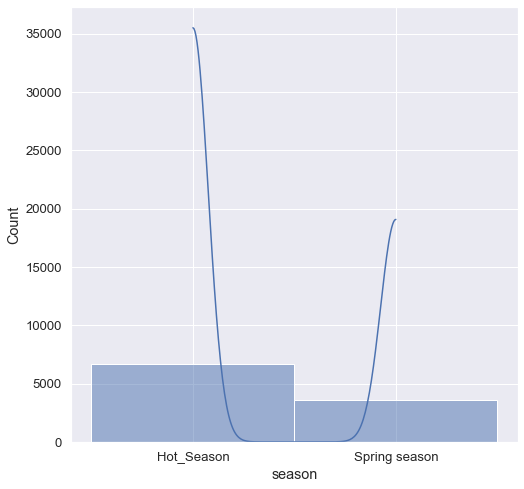

In [181]:
sns.histplot(data = df, x = 'season', bins = 10, kde = True)

In [182]:
sns.histplot(data = df, x = 'total_duration_minutes', bins = 10, kde = True)

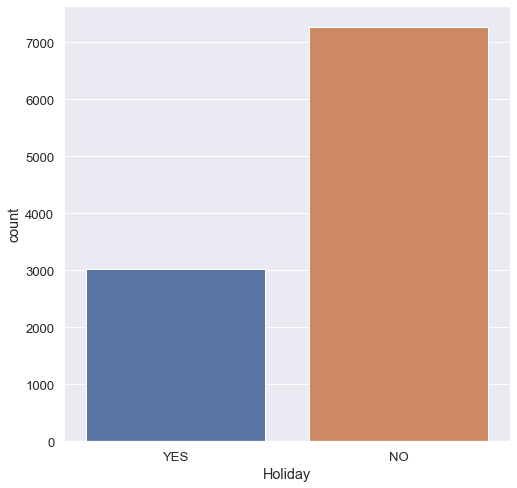

In [183]:
sns.countplot(data = df, x = 'Holiday')

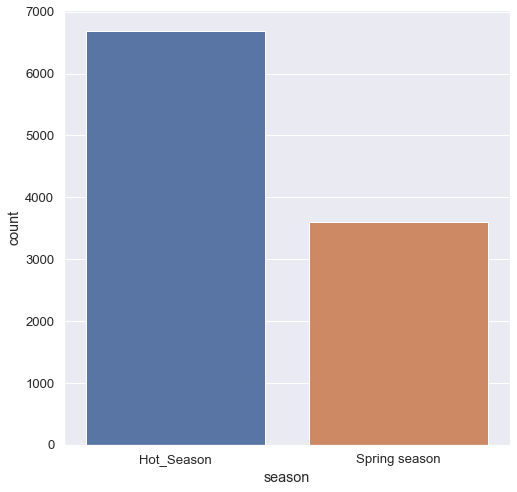

In [184]:
sns.countplot(data = df, x = 'season')

In [185]:
ax = sns.countplot(data = df, x = 'Airline')
ax.tick_params(axis='x', rotation=90)

In [186]:
idx = df['Airline'].value_counts().index

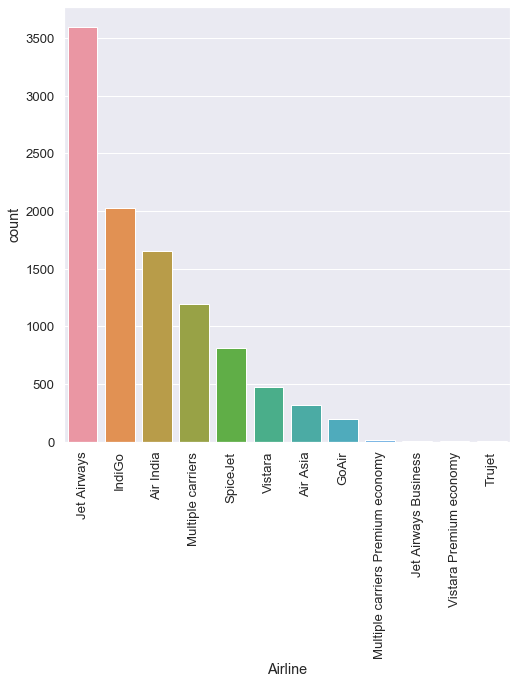

In [187]:
ax = sns.countplot(data = df, x = 'Airline' , order = idx)
ax.tick_params(axis='x', rotation=90)

In [188]:
Sidx = df['Source'].value_counts().index

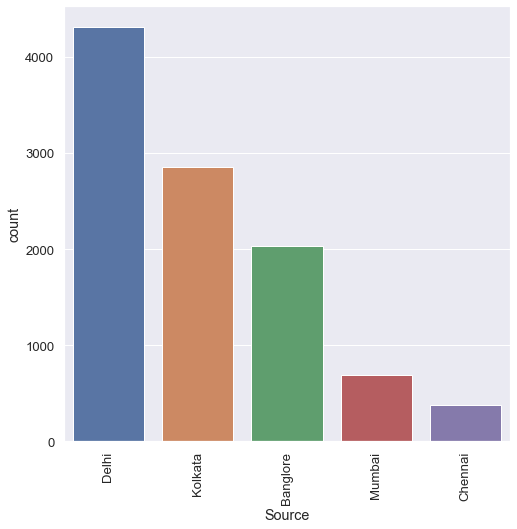

In [189]:
ax = sns.countplot(data = df, x = 'Source' , order = Sidx)
ax.tick_params(axis='x', rotation=90)

In [190]:
Didx = df['Destination'].value_counts().index

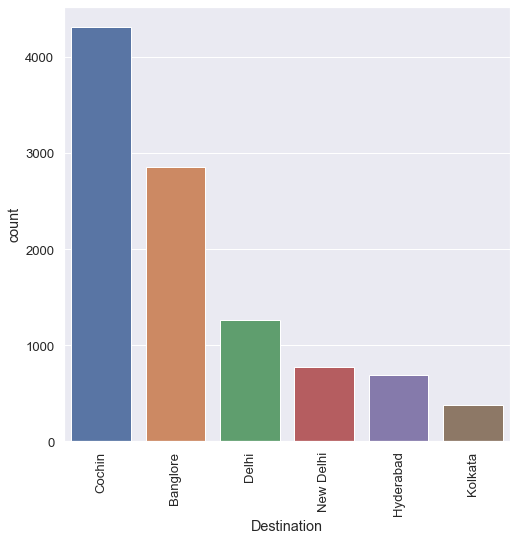

In [191]:
ax = sns.countplot(data = df, x = 'Destination' , order = Didx)
ax.tick_params(axis='x', rotation=90)

In [192]:
df.head()

Airline    Source Destination  Total_Stops  Price  Monthofjourney  \
1    Air India   Kolkata    Banglore            2   7662               5   
2  Jet Airways     Delhi      Cochin            2  13882               6   
3       IndiGo   Kolkata    Banglore            1   6218               5   
4       IndiGo  Banglore   New Delhi            1  13302               3   
5     SpiceJet   Kolkata    Banglore            0   3873               6   

          season  Dep_time_hour    Travel_Beriod  total_duration_minutes  \
1     Hot_Season              5  Midnight_travel                     445   
2     Hot_Season              9   morning_travel                    1140   
3     Hot_Season             18     night_travel                     325   
4  Spring season             16   evening_travel                     285   
5     Hot_Season              9   morning_travel                     145   

     travel_week_periode  Distance Holiday  
1        mid_week_travel    1561.0     YES  
2        end_week_travel    2083.0     YES  
3        end_week_travel    1561.0     YES  
4        mid_week_travel    1741.0     YES  
5  begaining_week_travel    1561.0      NO

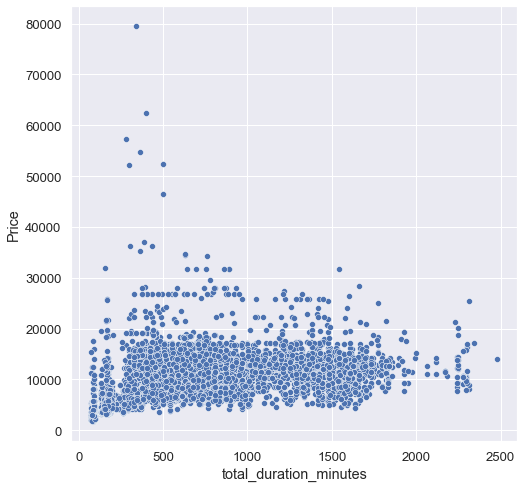

In [193]:
sns.scatterplot(data = df, x = 'total_duration_minutes', y = 'Price')

In [194]:
df['Price'].max()

79512

In [195]:
df[df['Price']==79512]

Airline    Source Destination  Total_Stops  Price  \
2924  Jet Airways Business  Banglore   New Delhi            1  79512   

      Monthofjourney         season  Dep_time_hour    Travel_Beriod  \
2924               3  Spring season              5  Midnight_travel   

      total_duration_minutes travel_week_periode  Distance Holiday  
2924                     340     mid_week_travel    1741.0     YES

In [196]:
df[df['Airline'] == 'Jet Airways Business']

Airline    Source Destination  Total_Stops  Price  \
657    Jet Airways Business  Banglore   New Delhi            1  52229   
2924   Jet Airways Business  Banglore   New Delhi            1  79512   
5372   Jet Airways Business  Banglore   New Delhi            1  62427   
7351   Jet Airways Business     Delhi      Cochin            2  46490   
9715   Jet Airways Business     Delhi      Cochin            2  52285   
10364  Jet Airways Business  Banglore   New Delhi            1  57209   

       Monthofjourney         season  Dep_time_hour    Travel_Beriod  \
657                 3  Spring season              5  Midnight_travel   
2924                3  Spring season              5  Midnight_travel   
5372                3  Spring season              5  Midnight_travel   
7351                3  Spring season             20     night_travel   
9715                3  Spring season             20     night_travel   
10364               3  Spring season              9   morning_travel   

       total_duration_minutes travel_week_periode  Distance Holiday  
657                       300     mid_week_travel    1741.0     YES  
2924                      340     mid_week_travel    1741.0     YES  
5372                      400     mid_week_travel    1741.0     YES  
7351                      500     end_week_travel    2083.0     YES  
9715                      500     mid_week_travel    2083.0      NO  
10364                     280     mid_week_travel    1741.0     YES

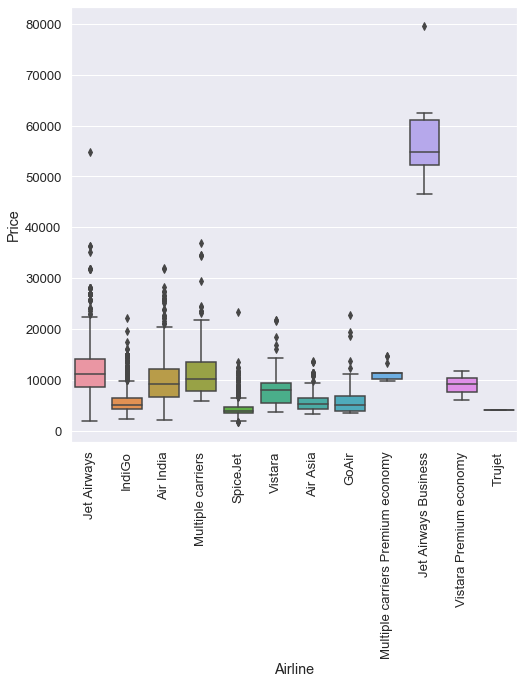

In [197]:
ax = sns.boxplot(data = df, x = 'Airline' , y = 'Price', order = idx)
ax.tick_params(axis='x', rotation=90)

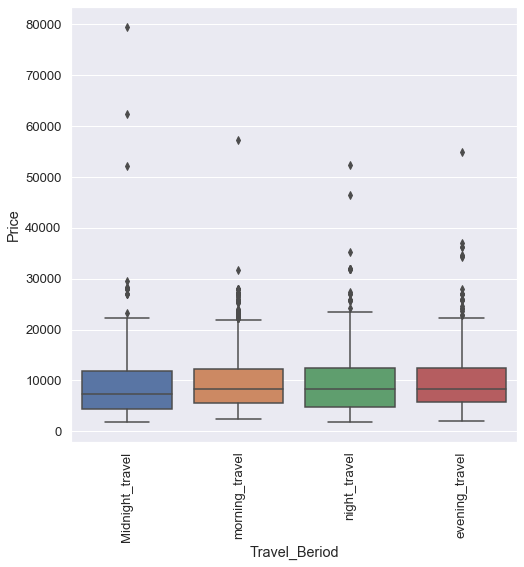

In [198]:
ax = sns.boxplot(data = df, x = 'Travel_Beriod' , y = 'Price')
ax.tick_params(axis='x', rotation=90)

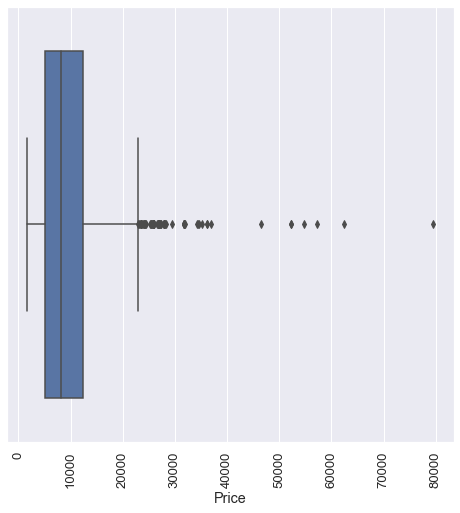

In [199]:
ax = sns.boxplot(data = df, x = 'Price')
ax.tick_params(axis='x', rotation=90)

In [200]:
df[df['Price'] > 21000].shape

(125, 13)

In [201]:
# df.drop(df[(df['Price'] > 21000)].index , axis = 0 , inplace = True)

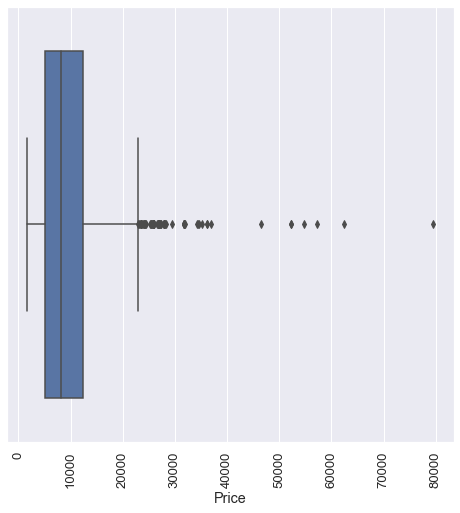

In [202]:
ax = sns.boxplot(data = df, x = 'Price')
ax.tick_params(axis='x', rotation=90)

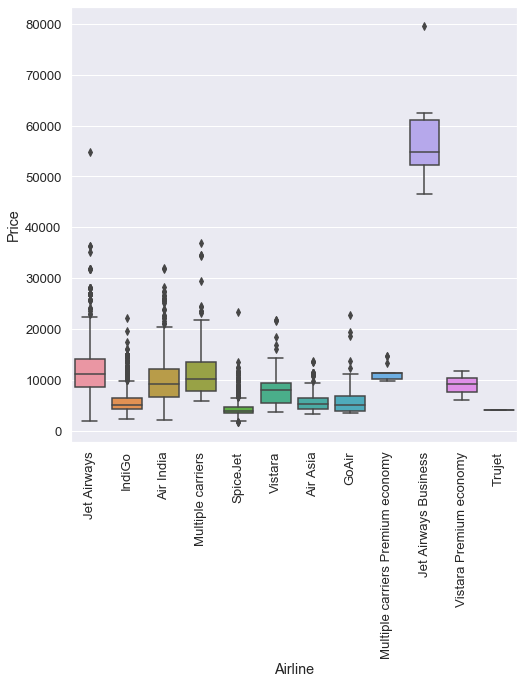

In [203]:
ax = sns.boxplot(data = df, x = 'Airline' , y = 'Price', order = idx)
ax.tick_params(axis='x', rotation=90)

In [204]:
df.drop(df[(df['Airline'] == 'IndiGo')& (df['Price'] > 9000 )].index , axis = 0 , inplace = True)

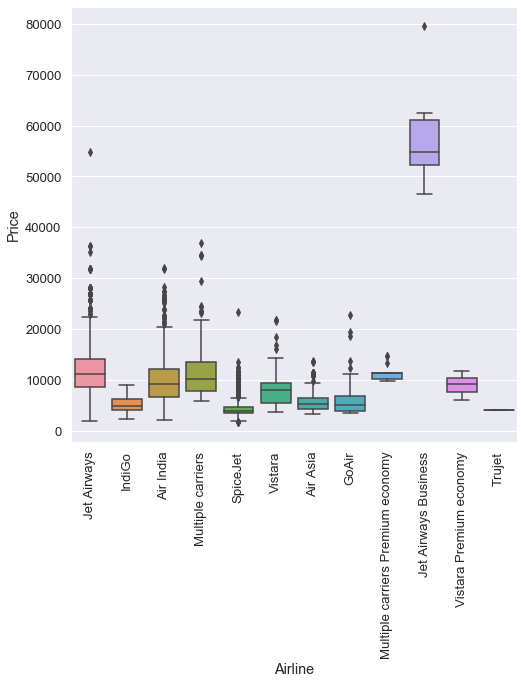

In [205]:
ax = sns.boxplot(data = df, x = 'Airline' , y = 'Price', order = idx)
ax.tick_params(axis='x', rotation=90)

In [206]:
df[(df['Airline'] == 'Vistara')& (df['Price'] > 12500)].shape

(15, 13)

In [207]:
df.drop(df[(df['Airline'] == 'Vistara')& (df['Price'] > 12500 )].index , axis = 0 , inplace = True)

In [208]:
df[(df['Airline'] == 'Air Asia')& (df['Price'] > 8000)].shape

(35, 13)

In [209]:
df.drop(df[(df['Airline'] == 'Air Asia')& (df['Price'] > 8000 )].index , axis = 0 , inplace = True)

In [210]:
df[(df['Airline'] == 'Air India')& (df['Price'] > 19000)].shape

(27, 13)

In [211]:
df.drop(df[(df['Airline'] == 'Air India')& (df['Price'] > 19000 )].index , axis = 0 , inplace = True)

In [212]:
df[(df['Airline'] == 'Jet Airways')& (df['Price'] > 22000)].shape

(72, 13)

In [213]:
df.drop(df[(df['Airline'] == 'Jet Airways')& (df['Price'] > 22000 )].index , axis = 0 , inplace = True)

In [214]:
df[(df['Airline'] == 'Multiple carriers')& (df['Price'] > 22000)].shape

(10, 13)

In [215]:
df.drop(df[(df['Airline'] == 'Multiple carriers')& (df['Price'] > 22000 )].index , axis = 0 , inplace = True)

In [216]:
df[(df['Airline'] == 'GoAir')& (df['Price'] > 11000)].shape

(6, 13)

In [217]:
df.drop(df[(df['Airline'] == 'GoAir')& (df['Price'] > 11000 )].index , axis = 0 , inplace = True)

In [218]:
df[(df['Airline'] == 'SpiceJet')& (df['Price'] > 8000)].shape

(41, 13)

In [219]:
df.drop(df[(df['Airline'] == 'SpiceJet')& (df['Price'] > 8000 )].index , axis = 0 , inplace = True)

In [220]:
# df.drop(df[df['Airline']== 'SpiceJet'].index , axis = 0 , inplace = True)

In [221]:
df.shape

(9954, 13)

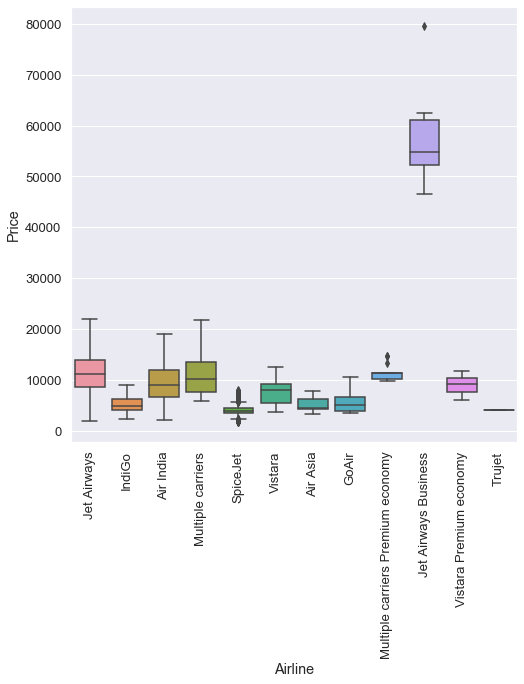

In [222]:
ax = sns.boxplot(data = df, x = 'Airline' , y = 'Price', order = idx)
ax.tick_params(axis='x', rotation=90)

In [223]:
df[(df['Airline'] == 'Jet Airways Business')& (df['Price'] > 70000)].shape

(1, 13)

In [224]:
# df.drop(df[(df['Airline'] == 'Jet Airways Business')& (df['Price'] > 70000 )].index , axis = 0 , inplace = True)

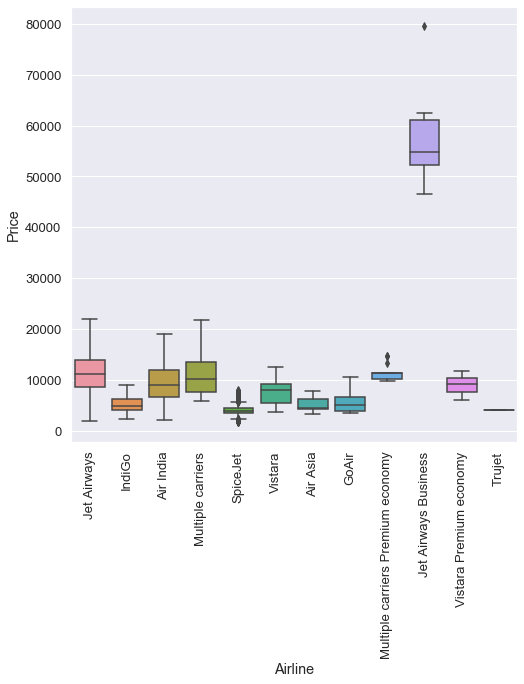

In [225]:
ax = sns.boxplot(data = df, x = 'Airline' , y = 'Price', order = idx)
ax.tick_params(axis='x', rotation=90)

In [226]:
df[(df['Airline'] == 'Multiple carriers Premium economy')& (df['Price'] > 12000)].shape

(3, 13)

In [227]:
# df.drop(df[(df['Airline'] == 'Multiple carriers Premium economy')& (df['Price'] > 12000 )].index , axis = 0 , inplace = True)

In [228]:
# df.drop(df[df['Airline']== 'Multiple carriers Premium economy'].index , axis = 0 , inplace = True)

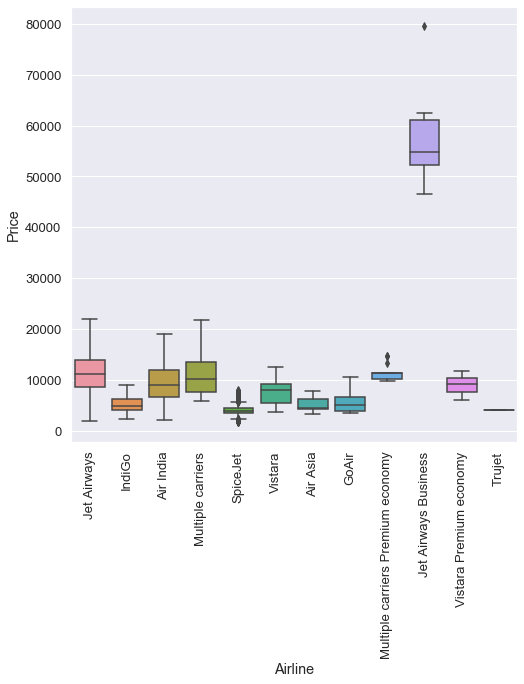

In [229]:
ax = sns.boxplot(data = df, x = 'Airline' , y = 'Price', order = idx)
ax.tick_params(axis='x', rotation=90)

In [230]:
df.head()

Airline    Source Destination  Total_Stops  Price  Monthofjourney  \
1    Air India   Kolkata    Banglore            2   7662               5   
2  Jet Airways     Delhi      Cochin            2  13882               6   
3       IndiGo   Kolkata    Banglore            1   6218               5   
5     SpiceJet   Kolkata    Banglore            0   3873               6   
6  Jet Airways  Banglore   New Delhi            1  11087               3   

          season  Dep_time_hour    Travel_Beriod  total_duration_minutes  \
1     Hot_Season              5  Midnight_travel                     445   
2     Hot_Season              9   morning_travel                    1140   
3     Hot_Season             18     night_travel                     325   
5     Hot_Season              9   morning_travel                     145   
6  Spring season             18     night_travel                     930   

     travel_week_periode  Distance Holiday  
1        mid_week_travel    1561.0     YES  
2        end_week_travel    2083.0     YES  
3        end_week_travel    1561.0     YES  
5  begaining_week_travel    1561.0      NO  
6  begaining_week_travel    1741.0      NO

In [231]:
df['Airline'].value_counts()

Jet Airways                          3519
IndiGo                               1903
Air India                            1626
Multiple carriers                    1186
SpiceJet                              773
Vistara                               456
Air Asia                              280
GoAir                                 188
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [232]:
df[df['Airline'] == 'Vistara Premium economy']

Airline    Source Destination  Total_Stops  Price  \
426   Vistara Premium economy  Banglore   New Delhi            0  11793   
7657  Vistara Premium economy   Chennai     Kolkata            0   9125   
8615  Vistara Premium economy  Banglore       Delhi            0   5969   

      Monthofjourney         season  Dep_time_hour   Travel_Beriod  \
426                3  Spring season             16  evening_travel   
7657               3  Spring season              7  morning_travel   
8615               4  Spring season             11  morning_travel   

      total_duration_minutes travel_week_periode  Distance Holiday  
426                      155     end_week_travel    1741.0     YES  
7657                     135     mid_week_travel    1355.0     YES  
8615                     170     end_week_travel    1745.0     YES

In [233]:
df[df['Price'] > 9000]['Airline'].value_counts()

Jet Airways                          2596
Air India                             808
Multiple carriers                     733
Vistara                               131
Multiple carriers Premium economy      13
GoAir                                  11
Jet Airways Business                    6
Vistara Premium economy                 2
Name: Airline, dtype: int64

In [234]:
df[df['Price'] < 9000]['Airline'].value_counts()

IndiGo                     1903
Jet Airways                 923
Air India                   818
SpiceJet                    773
Multiple carriers           453
Vistara                     325
Air Asia                    280
GoAir                       177
Trujet                        1
Vistara Premium economy       1
Name: Airline, dtype: int64

In [235]:
def AirlineClass (airline) : 
    if airline in ['Jet Airways'  , 'Multiple carriers Premium economy' , 'Jet Airways Business'] : 
        return 'First class airline'
    elif airline in ['Air India' , 'Vistara Premium economy', 'Multiple carriers'] : 
        return 'Medium Class airline'
    elif airline in ['IndiGo' , 'SpiceJet' , 'Vistara' ,'Air Asia' , 'GoAir' , 'Trujet'] :
        return 'Economy class'
    else : 
        return 'No Data for airline'

In [236]:
AirlineClass('Jet Airways Business')

'First class airline'

In [237]:
df['AirlineClass'] = df['Airline'].map(AirlineClass)

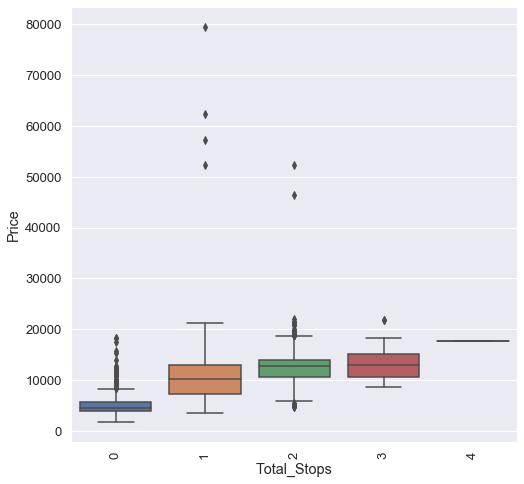

In [238]:
ax = sns.boxplot(data = df, x = 'Total_Stops' , y = 'Price')
ax.tick_params(axis='x', rotation=90)

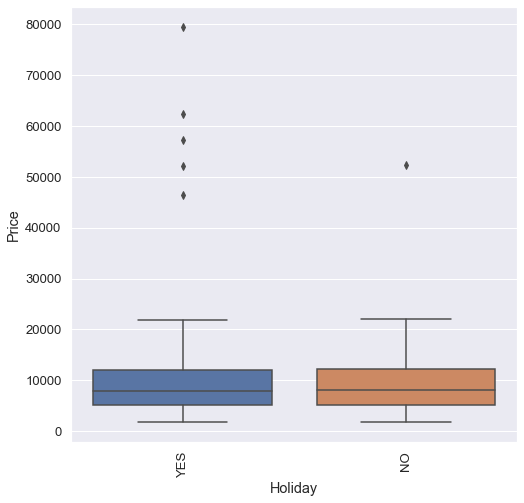

In [239]:
ax = sns.boxplot(data = df, x = 'Holiday' , y = 'Price')
ax.tick_params(axis='x', rotation=90)

In [240]:
df.head()

Airline    Source Destination  Total_Stops  Price  Monthofjourney  \
1    Air India   Kolkata    Banglore            2   7662               5   
2  Jet Airways     Delhi      Cochin            2  13882               6   
3       IndiGo   Kolkata    Banglore            1   6218               5   
5     SpiceJet   Kolkata    Banglore            0   3873               6   
6  Jet Airways  Banglore   New Delhi            1  11087               3   

          season  Dep_time_hour    Travel_Beriod  total_duration_minutes  \
1     Hot_Season              5  Midnight_travel                     445   
2     Hot_Season              9   morning_travel                    1140   
3     Hot_Season             18     night_travel                     325   
5     Hot_Season              9   morning_travel                     145   
6  Spring season             18     night_travel                     930   

     travel_week_periode  Distance Holiday          AirlineClass  
1        mid_week_travel    1561.0     YES  Medium Class airline  
2        end_week_travel    2083.0     YES   First class airline  
3        end_week_travel    1561.0     YES         Economy class  
5  begaining_week_travel    1561.0      NO         Economy class  
6  begaining_week_travel    1741.0      NO   First class airline

In [241]:
df = pd.get_dummies(df, columns = ['Source' , 'Destination' , 'Holiday' ,'season' , 'Travel_Beriod','travel_week_periode'], drop_first=False)


In [242]:
df.head()

Airline  Total_Stops  Price  Monthofjourney  Dep_time_hour  \
1    Air India            2   7662               5              5   
2  Jet Airways            2  13882               6              9   
3       IndiGo            1   6218               5             18   
5     SpiceJet            0   3873               6              9   
6  Jet Airways            1  11087               3             18   

   total_duration_minutes  Distance          AirlineClass  Source_Banglore  \
1                     445    1561.0  Medium Class airline                0   
2                    1140    2083.0   First class airline                0   
3                     325    1561.0         Economy class                0   
5                     145    1561.0         Economy class                0   
6                     930    1741.0   First class airline                1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
5               0             0               1              0   
6               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
5                     1                   0                  0   
6                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  \
1                      0                    0                      0   
2                      0                    0                      0   
3                      0                    0                      0   
5                      0                    0                      0   
6                      0                    0                      1   

   Holiday_NO  Holiday_YES  season_Hot_Season  season_Spring season  \
1           0            1                  1                     0   
2           0            1                  1                     0   
3           0            1                  1                     0   
5           1            0                  1                     0   
6           1            0                  0                     1   

   Travel_Beriod_Midnight_travel  Travel_Beriod_evening_travel  \
1                              1                             0   
2                              0                             0   
3                              0                             0   
5                              0                             0   
6                              0                             0   

   Travel_Beriod_morning_travel  Travel_Beriod_night_travel  \
1                             0                           0   
2                             1                           0   
3                             0                           1   
5                             1                           0   
6                             0                           1   

   travel_week_periode_begaining_week_travel  \
1                                          0   
2                                          0   
3                                          0   
5                                          1   
6                                          1   

   travel_week_periode_end_week_travel  travel_week_periode_mid_week_travel  
1                                    0                                    1  
2                                    1                                    0  
3                                    1                                    0  
5                                    0                                    0  
6             

In [243]:
Airlines = df['Airline'].unique()
Airline_lst = Airlines.tolist()
Airline_map = {}
for key in range(len(Airline_lst)):
    Airline_map[Airline_lst[key]]= key 

In [244]:
Airline_map

{'Air India': 0,
 'Jet Airways': 1,
 'IndiGo': 2,
 'SpiceJet': 3,
 'Multiple carriers': 4,
 'GoAir': 5,
 'Vistara': 6,
 'Air Asia': 7,
 'Vistara Premium economy': 8,
 'Jet Airways Business': 9,
 'Multiple carriers Premium economy': 10,
 'Trujet': 11}

In [245]:
df['Airline'] = df['Airline'].map(Airline_map)

In [246]:
df.head()

Airline  Total_Stops  Price  Monthofjourney  Dep_time_hour  \
1        0            2   7662               5              5   
2        1            2  13882               6              9   
3        2            1   6218               5             18   
5        3            0   3873               6              9   
6        1            1  11087               3             18   

   total_duration_minutes  Distance          AirlineClass  Source_Banglore  \
1                     445    1561.0  Medium Class airline                0   
2                    1140    2083.0   First class airline                0   
3                     325    1561.0         Economy class                0   
5                     145    1561.0         Economy class                0   
6                     930    1741.0   First class airline                1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
5               0             0               1              0   
6               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
5                     1                   0                  0   
6                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  \
1                      0                    0                      0   
2                      0                    0                      0   
3                      0                    0                      0   
5                      0                    0                      0   
6                      0                    0                      1   

   Holiday_NO  Holiday_YES  season_Hot_Season  season_Spring season  \
1           0            1                  1                     0   
2           0            1                  1                     0   
3           0            1                  1                     0   
5           1            0                  1                     0   
6           1            0                  0                     1   

   Travel_Beriod_Midnight_travel  Travel_Beriod_evening_travel  \
1                              1                             0   
2                              0                             0   
3                              0                             0   
5                              0                             0   
6                              0                             0   

   Travel_Beriod_morning_travel  Travel_Beriod_night_travel  \
1                             0                           0   
2                             1                           0   
3                             0                           1   
5                             1                           0   
6                             0                           1   

   travel_week_periode_begaining_week_travel  \
1                                          0   
2                                          0   
3                                          0   
5                                          1   
6                                          1   

   travel_week_periode_end_week_travel  travel_week_periode_mid_week_travel  
1                                    0                                    1  
2                                    1                                    0  
3                                    1                                    0  
5                                    0                                    0  
6                                 

In [247]:
AirlineClass = df['AirlineClass'].unique()
Airline_lst_class = AirlineClass.tolist()
Airline_class_map = {}
for key in range(len(Airline_lst_class)):
    Airline_class_map[Airline_lst_class[key]]= key 

In [248]:
Airline_class_map

{'Medium Class airline': 0, 'First class airline': 1, 'Economy class': 2}

In [249]:
df['AirlineClass'] = df['AirlineClass'].map(Airline_class_map)

In [250]:
df.head()

Airline  Total_Stops  Price  Monthofjourney  Dep_time_hour  \
1        0            2   7662               5              5   
2        1            2  13882               6              9   
3        2            1   6218               5             18   
5        3            0   3873               6              9   
6        1            1  11087               3             18   

   total_duration_minutes  Distance  AirlineClass  Source_Banglore  \
1                     445    1561.0             0                0   
2                    1140    2083.0             1                0   
3                     325    1561.0             2                0   
5                     145    1561.0             2                0   
6                     930    1741.0             1                1   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
5               0             0               1              0   
6               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
5                     1                   0                  0   
6                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  \
1                      0                    0                      0   
2                      0                    0                      0   
3                      0                    0                      0   
5                      0                    0                      0   
6                      0                    0                      1   

   Holiday_NO  Holiday_YES  season_Hot_Season  season_Spring season  \
1           0            1                  1                     0   
2           0            1                  1                     0   
3           0            1                  1                     0   
5           1            0                  1                     0   
6           1            0                  0                     1   

   Travel_Beriod_Midnight_travel  Travel_Beriod_evening_travel  \
1                              1                             0   
2                              0                             0   
3                              0                             0   
5                              0                             0   
6                              0                             0   

   Travel_Beriod_morning_travel  Travel_Beriod_night_travel  \
1                             0                           0   
2                             1                           0   
3                             0                           1   
5                             1                           0   
6                             0                           1   

   travel_week_periode_begaining_week_travel  \
1                                          0   
2                                          0   
3                                          0   
5                                          1   
6                                          1   

   travel_week_periode_end_week_travel  travel_week_periode_mid_week_travel  
1                                    0                                    1  
2                                    1                                    0  
3                                    1                                    0  
5                                    0                                    0  
6                                    0                                    0

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 1 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    9954 non-null   int64  
 1   Total_Stops                                9954 non-null   int64  
 2   Price                                      9954 non-null   int64  
 3   Monthofjourney                             9954 non-null   int64  
 4   Dep_time_hour                              9954 non-null   int64  
 5   total_duration_minutes                     9954 non-null   int64  
 6   Distance                                   9954 non-null   float64
 7   AirlineClass                               9954 non-null   int64  
 8   Source_Banglore                            9954 non-null   uint8  
 9   Source_Chennai                             9954 non-null   uint8  
 10  Source_Delhi           

# SPLIT DATA 

In [252]:
x = df.drop(columns = ['Price' , 'AirlineClass'])
y = df['Price']

In [253]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [254]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [256]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [257]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LR
Training Score: 0.4802374781603379
Test Score: 0.4719086662814961
------------------------------
Using model: KNNR
Training Score: 0.7513506306630313
Test Score: 0.6413808090657815
------------------------------
Using model: SVR
Training Score: 0.015974705675269707
Test Score: 0.008219836256262547
------------------------------
Using model: DT
Training Score: 0.9295028171310564
Test Score: 0.6369215278276192
------------------------------
Using model: RF
Training Score: 0.9126077619712593
Test Score: 0.7523285208760739
------------------------------
Using model: XGBR
Training Score: 0.8930866024854945
Test Score: 0.8126250664760423
------------------------------


In [264]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

model.score(x_test,y_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_test, y_pred)


0.8126250664760423

In [270]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33,normalize=False)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    
XGBRegressorModel = XGBRegressor(n_estimators=100)

Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel , XGBRegressorModel]


In [274]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(x_train, y_train)
    print(f'Train Score is : {Model.score(x_train, y_train)}')
    print(f'Test Score is : {Model.score(x_test, y_test)}')
    y_pred = Model.predict(x_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print(f'R2 value is  : {r2_score(y_test, y_pred, multioutput="variance_weighted")}')
    
    print('=================================================')


for Model LinearRegression
Train Score is : 0.47966797630013736
Test Score is : 0.47112461967198604
MAE value is  : 2230.2154696132598
MSE value is  : 9297670.202410849
MdSE value is  : 1752.0
R2 value is  : 0.47112461967198604
for Model Lasso
Train Score is : 0.4802686125310788
Test Score is : 0.47180279508694767
MAE value is  : 2226.5911801221123
MSE value is  : 9285747.826020809
MdSE value is  : 1736.458202400725
R2 value is  : 0.47180279508694767
for Model Ridge
Train Score is : 0.48028748629567464
Test Score is : 0.471800655131961
MAE value is  : 2227.1245495812454
MSE value is  : 9285785.446595436
MdSE value is  : 1735.6503440887973
R2 value is  : 0.471800655131961
for Model RandomForestRegressor


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed p

Train Score is : 0.8112315261603895
Test Score is : 0.7708807351925783
MAE value is  : 1433.0969836953304
MSE value is  : 4027934.4443619717
MdSE value is  : 1021.9924953059408
R2 value is  : 0.7708807351925783
for Model GradientBoostingRegressor
Train Score is : 0.9295008879846423
Test Score is : 0.5798412816093731
MAE value is  : 1733.683626946619
MSE value is  : 7386422.854171833
MdSE value is  : 1078.1246495201467
R2 value is  : 0.5798412816093731
for Model SVR
Train Score is : 0.015974705675269707
Test Score is : 0.008219836256262547
MAE value is  : 3323.262264960182
MSE value is  : 17435572.194839526
MdSE value is  : 3000.350650945502
R2 value is  : 0.008219836256262547
for Model DecisionTreeRegressor
Train Score is : 0.5998883756151927
Test Score is : 0.5675245600914479
MAE value is  : 1882.6431908194731
MSE value is  : 7602951.7736643255
MdSE value is  : 1456.9022988505749
R2 value is  : 0.5675245600914479
for Model KNeighborsRegressor
Train Score is : 0.7513506306630313
Test S

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

SelectedModel = RandomForestRegressor(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10],
                      'criterion':['squared_error','absolute_error','poisson']}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(x_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)